# Part II - Analyze Users

---

### Ordering Breakfast via efood is a quite new habit that Marketing thinks could create more loyal customers. Which segment could be a valuable target group for a Marketing campaign about “Breakfast” cuisine_parent?

#### NOTE:  (parts of the code have been taken from the notes from my MSc courses in Data Science)

> #### Firtsly we import our dataset and the libraries that we will need. We firslty import the table created from SQL (Part1) analysis to explore if the few features could provide a good indication of clustering

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
#import sea
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [2]:
efood_df=pd.read_csv('frequency-basket_customers_2.csv')
efood_df=efood_df.fillna(0)
efood_df

,city,breakfast_basket,efood_basket,breakfast_freq,efood_freq,breakfast_users3freq_perc,efood_users3freq_perc
0,Βόλος,5.127786,8.084162,3.732746,4.430482,0.306471,0.388479
1,Λάρισα,5.404477,8.906952,3.096073,3.845663,0.239130,0.339641
2,Ξάνθη,4.887139,7.232083,4.271417,5.353961,0.345600,0.431126
3,Ιωάννινα,5.755508,9.117966,3.115090,4.031315,0.257184,0.364332
4,Ρόδος,6.248685,10.312610,3.715174,4.547736,0.305615,0.391304
5,Αγρίνιο,3.754687,7.027060,4.522838,5.091187,0.354446,0.409806
6,Λαμία,3.796717,8.471640,4.463970,4.873190,0.346081,0.404250
7,Αλεξανδρούπολη,5.060475,8.482929,3.496803,3.753839,0.267903,0.308943
8,Δράμα,5.457014,8.342337,3.687360,4.530482,0.286289,0.386106
9,Βέροια,5.258880,9.103884,3.342826,3.852592,0.265449,0.326928


> #### We check the "statistics" of the dataset

In [3]:
efood_df.describe()

,breakfast_basket,efood_basket,breakfast_freq,efood_freq,breakfast_users3freq_perc,efood_users3freq_perc
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,4.951898,6.569790,3.744573,3.279692,0.291145,0.342456
std,0.909861,3.715425,0.785561,1.896178,0.056118,0.053763
min,3.488836,0.000000,2.562278,0.000000,0.172840,0.239643
25%,4.272208,6.402595,3.182026,2.876103,0.252958,0.313008
50%,4.887139,8.091877,3.668380,3.852592,0.292295,0.339641
75%,5.594782,9.005418,4.282415,4.539109,0.323828,0.379507
max,6.722163,10.312610,6.125000,5.353961,0.426471,0.442735


>#### Dropping the column <font color='dodgerblue'> "city" </font> 


In [4]:
efood_df_2=efood_df[['breakfast_basket','efood_basket', 'breakfast_freq', 'efood_freq','breakfast_users3freq_perc', 'efood_users3freq_perc']]

>#### Implementing the elbow techinique to find the best number of clusters. In more detail we implemented the K-means method.

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inertia')

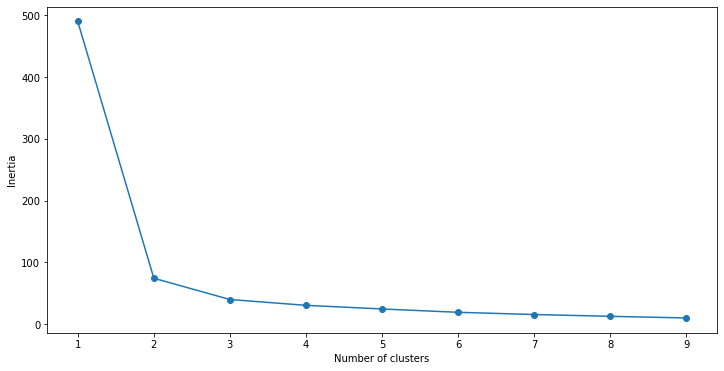

In [5]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_init = 10, n_clusters = cluster, init='k-means++')
    kmeans.fit(efood_df_2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

> #### We see that the "elbow" of the plot can be found on number 2 of the x-axis, that is 2 clusters.
> #### Furthermore we will find another metric to check and confirm our previous indication (of having 2 clusters) using the Silhouette metric and visualizations.

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

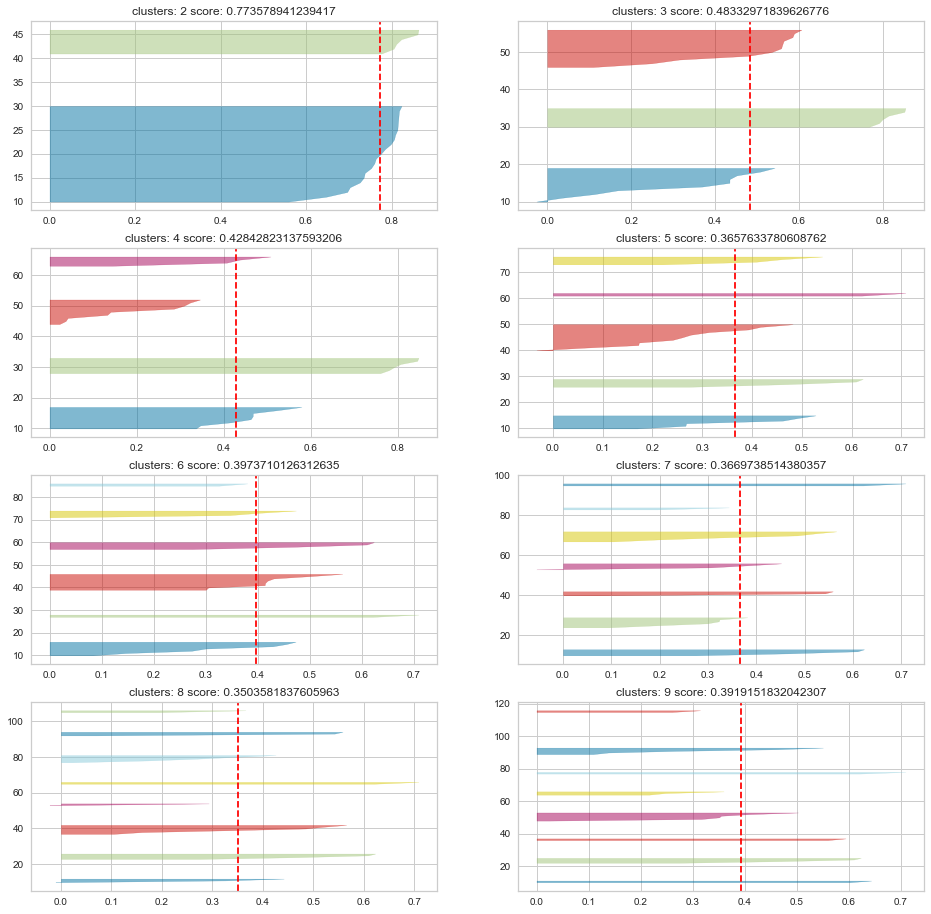

In [6]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans = None
best_score = -1
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(efood_df_2)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [7]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.773578941239417),
 (3, 0.48332971839626776),
 (4, 0.42842823137593206),
 (6, 0.3973710126312635),
 (9, 0.3919151832042307),
 (7, 0.3669738514380357),
 (5, 0.3657633780608762),
 (8, 0.3503581837605963)]

> #### From the above we see that the number of clusters suggested from both "elbow" method and Silhouette values is 2. This is depicted from the above graphs as well.
>
> #### Next step is to inmplement the PCA method in order to manage to visualize our many features problem to a scatter plot.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(efood_df_2)
pca.explained_variance_ratio_

array([0.882203  , 0.08535367])

<AxesSubplot:>

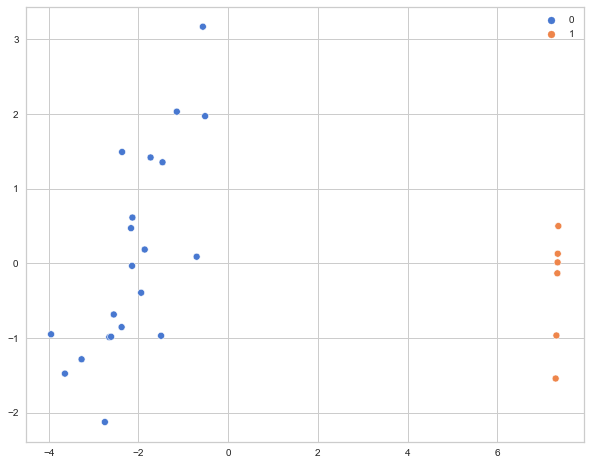

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_kmeans.labels_, palette=sns.color_palette('muted', n_colors=2))

> #### Now we have our plot and our two clusters. Although what is the interpetation of these? 
> #### To get a better sense and feel of our results we will implement the following method in which we create radar charts (from the following function), from which we can get a better understanding of the clusters.


In [10]:
matrix_scaler = lambda a: (a - a.min()) / (a.max() - a.min())
cluster_centers = matrix_scaler(best_kmeans.cluster_centers_)

def radar_factory(keys, values, axes=None, fontsize=12):
    
    import math
    
    if axes is None:
        # Initialise the spider plot.
        plt.figure(figsize=(10, 10))
        ax = plt.subplot(111, polar=True)
    else:
        ax = axes
        
    num_categories = len(keys)
 
    # What will be the angle of each axis in the plot? 
    # We divide the plot / number of variables + 1.
    # We add one because we want to do a complete circle.
    angles = np.arange(num_categories + 1)
    angles = angles / num_categories * 2 * np.pi 
    angles[-1] = angles[0]
 
    # We want the first axis to be on top.
    ax.set_theta_offset(np.pi / 2)
    # Theta direction is -1 clockwise,
    # and 1 counterclockwise
    ax.set_theta_direction(-1)
 
    # Draw one axis per variable and add x labels
    ax.tick_params(labelsize=fontsize)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(keys)
 
    # Draw y labels
    ax.set_rlabel_position(0)
    max_y = max(values)
    min_y = min(values)

    values.append(values[0])
    ax.plot(list(angles), values, 
            linewidth=1, linestyle='solid')

    ax.fill(angles, values, 'b', alpha=0.1)
    yticks = ax.get_yticks()
    ax.set_yticklabels([])
    ylims = ax.get_ylim()
    ax.set_ylim(min(yticks[0], ylims[0]), 
                max(yticks[-1], ylims[1]))

> #### Below the radar charts

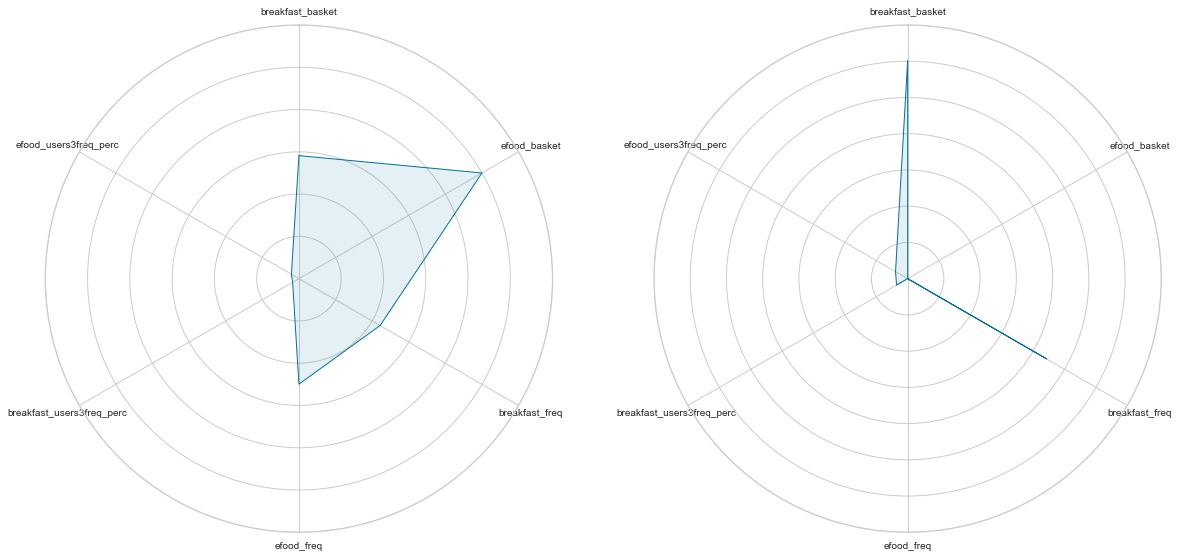

In [11]:
plt.figure(figsize=(2 * 10, 1 * 10))
for i, cs in enumerate(cluster_centers):
    ax = plt.subplot(1, 2, i + 1, polar=True)
    radar_factory(efood_df_2.columns, list(cs), axes=ax, fontsize=10)

> #### As we can see above and it probably comes as no surprise, two clusters emerging from our manipulation. One that is mainly orders from all the cuisines and another one that is specificall to the ones that choose breakfast and has a respective high frequency.
> #### Although this is a not a nice and so accurate insight as in general our data are in a way biased cause we manipulated them in a way that these 2 clusters were pre-determined
> #### (We split the data from the SQL part in two main categories - <font color='dodgerblue'> Breakfast </font>  &  <font color='dodgerblue'>  Breakfast + all other cuisines</font>).
>
> #### This is why we maybe need to explore more the data, thus using the orders dataset that was provided, seems a better way. 

In [12]:
efood_df_full=pd.read_csv('Assessment exercise dataset - orders.csv')
efood_df_full=efood_df_full.fillna(0)
efood_df_full

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


> #### Manuipulate thedata to create dummy variables as we have categorical data.

In [13]:
efood_df_full['cuisine'] = efood_df_full['cuisine'].str.replace('Street food', "4")
efood_df_full['cuisine'] = efood_df_full['cuisine'].str.replace('Breakfast', "1")
efood_df_full['cuisine'] = efood_df_full['cuisine'].str.replace('Meat', "2")
efood_df_full['cuisine'] = efood_df_full['cuisine'].str.replace('Italian', "3")

efood_df_full

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,1,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,1,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,1,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,1,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,1,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,4,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,4,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,4,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,4,True,14.7


> #### Grouping by city, cuisine and paid cash and aggregate the other columns. We use count distinct (nunique) for the users number.

In [14]:
group_city=efood_df_full.groupby(['city','paid_cash','cuisine'],as_index=False)
efood_df_full_2=group_city.aggregate({'user_id': 'nunique','order_id': 'count','amount':'sum'})
efood_df_full_2

,city,paid_cash,cuisine,user_id,order_id,amount
0,Άνδρος,False,2,2,2,12.1
1,Άνδρος,True,2,4,6,67.2
2,Άργος,False,1,115,301,1656.9
3,Άργος,False,2,169,355,4062.6
4,Άργος,False,3,79,117,1220.5
...,...,...,...,...,...,...
273,Φλώρινα,False,2,171,353,2537.3
274,Φλώρινα,False,4,164,283,2358.8
275,Φλώρινα,True,1,179,432,1717.3
276,Φλώρινα,True,2,215,382,2563.4


> #### We convert the paid_cash column in 1's and 0's as we want to get dummies from this column as well. (Although it was already boolean, for some reason it could not convert when I was using get_dummies)

In [15]:
efood_df_full_2=efood_df_full_2[['paid_cash','cuisine','user_id','order_id','amount']]
efood_df_full_2['paid_cash']=efood_df_full_2['paid_cash'].astype(int)
#efood_df_full_2['paid_cash']=efood_df_full_2['paid_cash'].astype(bool)
efood_df_full_2['paid_cash'].replace({1: "1", 2: "2"}, inplace=True)


efood_df_full_2

<ipython-input-15-9da9c1f62b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efood_df_full_2['paid_cash']=efood_df_full_2['paid_cash'].astype(int)
C:\Users\cob_n\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,paid_cash,cuisine,user_id,order_id,amount
0,0,2,2,2,12.1
1,1,2,4,6,67.2
2,0,1,115,301,1656.9
3,0,2,169,355,4062.6
4,0,3,79,117,1220.5
...,...,...,...,...,...
273,0,2,171,353,2537.3
274,0,4,164,283,2358.8
275,1,1,179,432,1717.3
276,1,2,215,382,2563.4


> #### Creating our new categories'features and reshaping our data we get the following.

In [16]:
efood_df_full_2 = pd.get_dummies(efood_df_full_2, drop_first=False)
#efood_df_full_2=efood_df_full_2.drop['cuisine_2']
#efood_df_full_2=efood_df_full_2.drop(['cuisine_2'],axis=1)
efood_df_full_2['Basket']=efood_df_full_2['amount']/efood_df_full_2['order_id']
efood_df_full_2['Frequency']=efood_df_full_2['order_id']/efood_df_full_2['user_id']
efood_df_full_2=efood_df_full_2.drop(['order_id'],axis=1)
efood_df_full_2=efood_df_full_2.drop(['user_id'],axis=1)

efood_df_full_2

,amount,paid_cash_0,paid_cash_1,cuisine_1,cuisine_2,cuisine_3,cuisine_4,Basket,Frequency
0,12.1,1,0,0,1,0,0,6.050000,1.000000
1,67.2,0,1,0,1,0,0,11.200000,1.500000
2,1656.9,1,0,1,0,0,0,5.504651,2.617391
3,4062.6,1,0,0,1,0,0,11.443944,2.100592
4,1220.5,1,0,0,0,1,0,10.431624,1.481013
...,...,...,...,...,...,...,...,...,...
273,2537.3,1,0,0,1,0,0,7.187819,2.064327
274,2358.8,1,0,0,0,0,1,8.334982,1.725610
275,1717.3,0,1,1,0,0,0,3.975231,2.413408
276,2563.4,0,1,0,1,0,0,6.710471,1.776744


In [37]:
group_city=efood_df_full_2.groupby(['paid_cash_0','paid_cash_1','cuisine_1','cuisine_2','cuisine_3','cuisine_4'],as_index=False)
efood_df_full_2=group_city.aggregate({'Basket': 'sum','amount': 'sum','Frequency':'sum'})
efood_df_full_2

,paid_cash_0,paid_cash_1,cuisine_1,cuisine_2,cuisine_3,cuisine_4,Basket,amount,Frequency
0,0,1,0,0,0,1,298.213410,383373.70,35.628147
1,0,1,0,0,1,0,486.809327,692897.15,56.008529
2,0,1,0,1,0,0,422.363596,1058469.91,71.475234
3,0,1,1,0,0,0,221.732412,613706.68,120.941698
4,1,0,0,0,0,1,305.484859,241605.30,39.127061
5,1,0,0,0,1,0,519.897147,456461.99,54.000169
6,1,0,0,1,0,0,432.739390,661109.46,76.361232
7,1,0,1,0,0,0,235.066574,445620.51,112.487152


> #### Next important step is to scale our data as we have data that show amount of money and at the same time we have percentages that less than 1 and finally caregorical values.

In [17]:
scaler = StandardScaler()
scaler.fit(efood_df_full_2)
X = scaler.transform(efood_df_full_2)
scaled_efood_df_full_2 = pd.DataFrame(X, index=efood_df_full_2.index, columns=efood_df_full_2.columns)
scaled_efood_df_full_2

,amount,paid_cash_0,paid_cash_1,cuisine_1,cuisine_2,cuisine_3,cuisine_4,Basket,Frequency
0,-0.540755,1.0,-1.0,-0.646813,1.615670,-0.591198,-0.451069,-0.880680,-1.224096
1,-0.538935,-1.0,1.0,-0.646813,1.615670,-0.591198,-0.451069,0.135817,-0.633359
2,-0.486410,1.0,-1.0,1.546041,-0.618938,-0.591198,-0.451069,-0.988320,0.686808
3,-0.406925,1.0,-1.0,-0.646813,1.615670,-0.591198,-0.451069,0.183966,0.076223
4,-0.500829,1.0,-1.0,-0.646813,-0.618938,1.691482,-0.451069,-0.015844,-0.655792
...,...,...,...,...,...,...,...,...,...
273,-0.457322,1.0,-1.0,-0.646813,1.615670,-0.591198,-0.451069,-0.656100,0.033378
274,-0.463219,1.0,-1.0,-0.646813,-0.618938,-0.591198,2.216956,-0.429675,-0.366808
275,-0.484415,-1.0,1.0,1.546041,-0.618938,-0.591198,-0.451069,-1.290194,0.445807
276,-0.456459,-1.0,1.0,-0.646813,1.615670,-0.591198,-0.451069,-0.750317,-0.306394


> #### In the next blocks of code we repeat the previous procedure (elbow, silhouette) trying to find the best clusters.
> #### Although from silhouette 10 clusters are suggested we choose 9 as they seem to make more sense looking also the elbow chart and the silhouette.

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inertia')

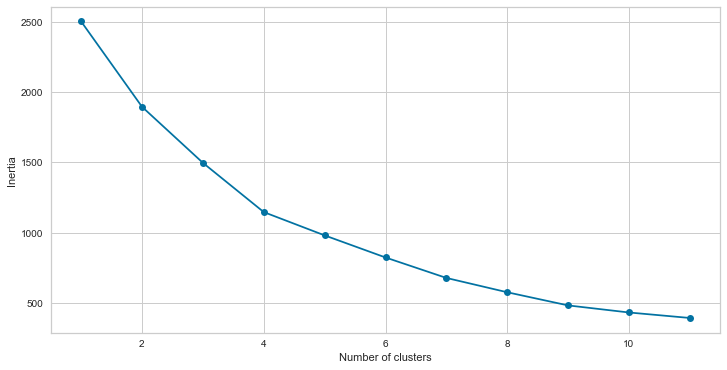

In [18]:
SSE = []

for cluster in range(1,12):
    kmeans = KMeans(n_init = 11, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_efood_df_full_2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

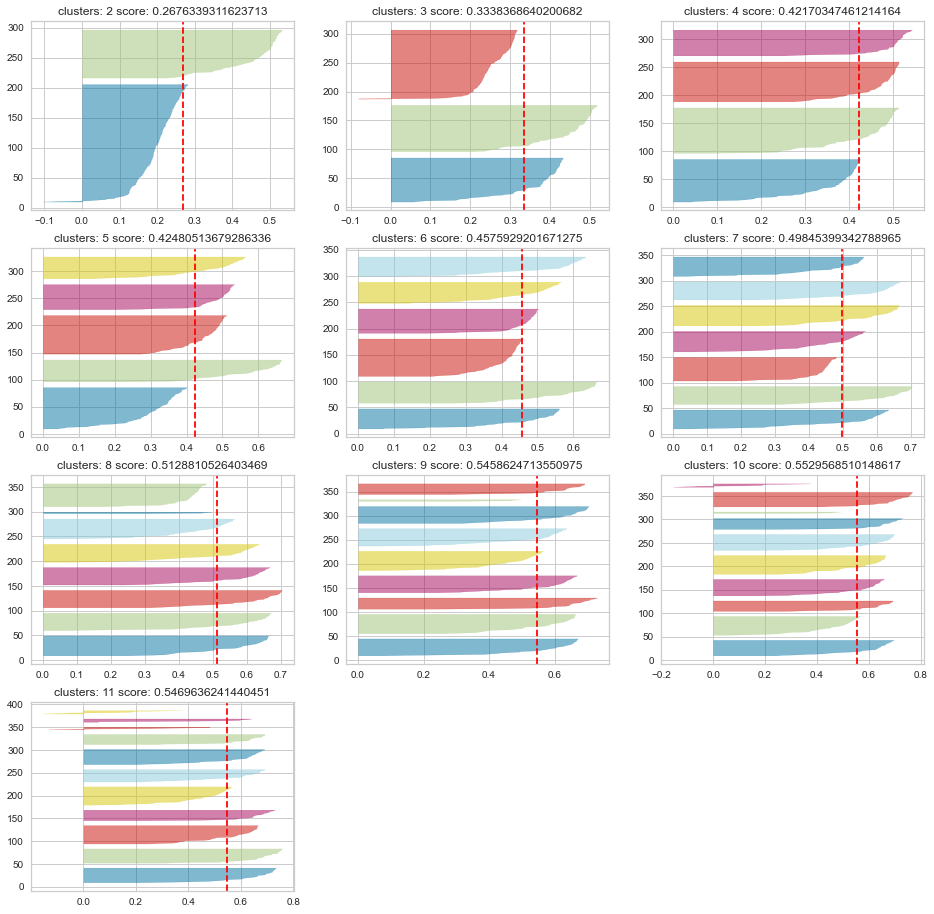

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans = None
best_score = -1
for n_clusters in range(2, 12):
    plt.subplot(4, 3, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_efood_df_full_2)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [20]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(10, 0.5529568510148617),
 (11, 0.5469636241440451),
 (9, 0.5458624713550975),
 (8, 0.5128810526403469),
 (7, 0.49845399342788965),
 (6, 0.4575929201671275),
 (5, 0.42480513679286336),
 (4, 0.42170347461214164),
 (3, 0.3338368640200682),
 (2, 0.2676339311623713)]

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


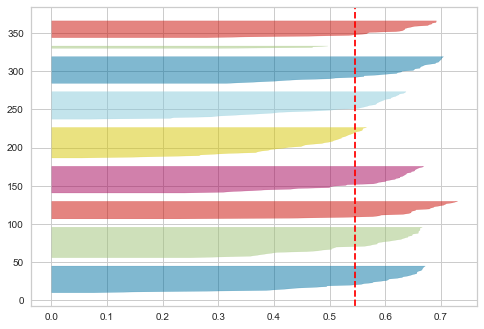

In [38]:
kmeans = KMeans(9, n_init=9,random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_efood_df_full_2)
scores[n_clusters] = visualizer.silhouette_score_
best_kmeans = kmeans

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(scaled_efood_df_full_2)
pca.explained_variance_ratio_

array([0.28557544, 0.22501231])

<AxesSubplot:>

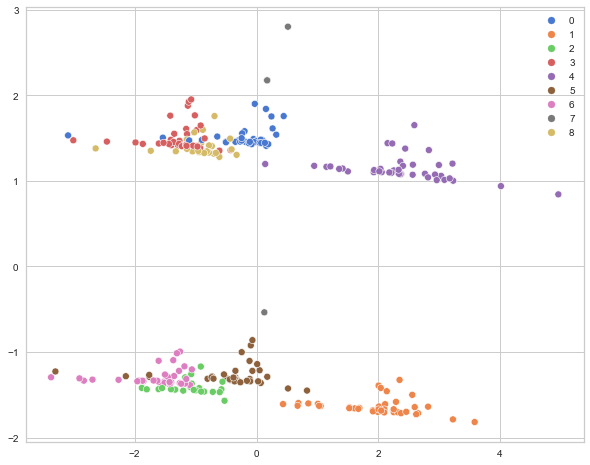

In [40]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_kmeans.labels_, palette=sns.color_palette('muted', n_colors=9))

In [41]:
matrix_scaler = lambda a: (a - a.min()) / (a.max() - a.min())
cluster_centers = matrix_scaler(best_kmeans.cluster_centers_)

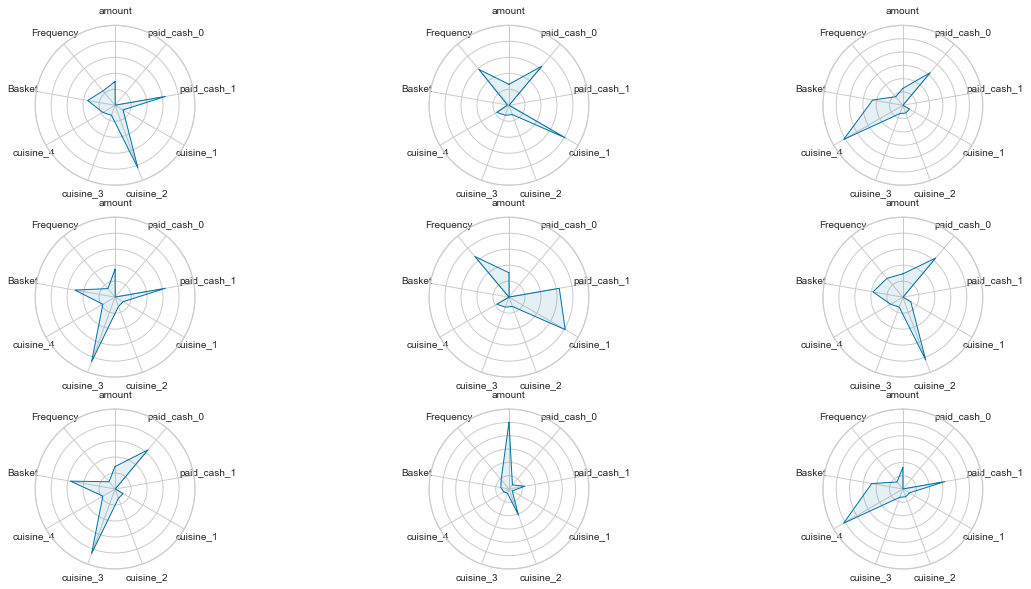

In [42]:
plt.figure(figsize=(2 * 10, 1 * 10))
for i, cs in enumerate(cluster_centers):
    ax = plt.subplot(3,3, i + 1, polar=True)
    radar_factory(scaled_efood_df_full_2.columns, list(cs), axes=ax, fontsize=10)

> #### The results above caregorize in a better way our data and more specifically we can get insights for the customers and their tendencies so we can focus on the best segments for implementing the marketing campaigns.
> #### Insights and conclusions will be included in a small report.

---

### Appendix

> #### Below are displayed some other efforts of optimizing our model and another way of clusteting our data.
> #### Gaussian Mixture method:

In [43]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8, covariance_type='full', max_iter=30, 
                      random_state=0)
y_pred = gmm.fit_predict(scaled_efood_df_full_2)

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(scaled_efood_df_full_2)
pca.explained_variance_ratio_

array([0.28557544, 0.22501231])

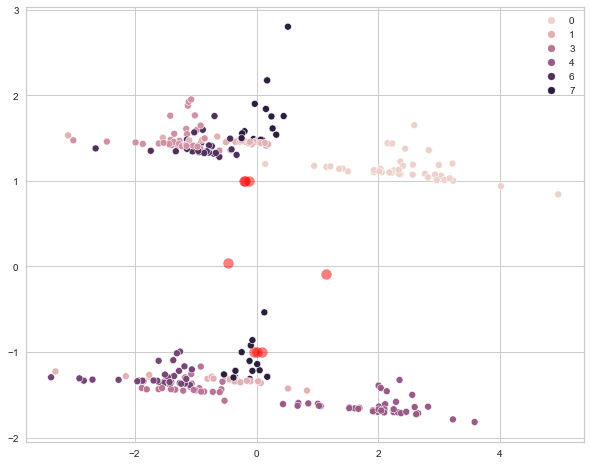

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)